Import libraries needed to visualize dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import scipy.stats as stats

In [ ]:
data = pd.read_csv('../data/raw/tcga_rna_count_data_crc.csv', header=None, index_col=0, skiprows=1)
data.index.name = 'Gene'
data.columns = data.iloc[0]  # Setting the sample IDs as the column names
data = data.drop(data.index[0])  # Drop the duplicate row of sample IDs
data = data.transpose()  # Transpose so that we have samples as rows and genes as columns

# List of relevant genes for testing
relevant_genes = [
    'ATOH1', 'GRM8', 'PCDH8', 'CEL', 'CFTR', 'ENGASE', 'GP2', 'C5orf52', 
    'SATB2', 'CDX2', 'CYP2B6', 'NKD1', 'SMAD2', 'MTOR', 'NFE2L2', 'RB1', 
    'KEAP1', 'TERT', 'RASA1', 'CDC73', 'CTNNA1', 'ERBB4', 'CD8A', 'PRF1', 
    'GZMA', 'GZMB', 'CX3CL1', 'CXCL9', 'CXCL10', 'IFNG', 'IL1B', 'LAG3', 
    'CTLA4', 'CD274', 'PDCD1', 'TIGIT', 'IDO1', 'PDCD1LG2', 'VEGFA', 'VEGFB', 'VEGFC', 'VEGFD'
]

# Initialize a DataFrame to store the results
shapiro_results = pd.DataFrame(columns=['Gene', 'Statistic', 'P-Value'])

# Perform Shapiro-Wilk test for each relevant gene
for gene in relevant_genes:
    if gene in data.columns:
        gene_expression = data[gene].astype(float).dropna()
        statistic, p_value = stats.shapiro(gene_expression)
        shapiro_results = shapiro_results.append({
            'Gene': gene,
            'Statistic': statistic,
            'P-Value': p_value
        }, ignore_index=True)
    else:
        print(f"{gene} not found in dataset.")

results_csv_path = 'shapiro_results.csv'
shapiro_results.to_csv(results_csv_path, index=False)

results_csv_path

Using the missingno Python library to identify and visualize missing data patterns prior to machine learning

The missingno correlation heatmap measures nullity correlation: how strongly the presence or absence of one variable affects the presence of another. From the heatmap below, we can infer the missing values in msi_status is not correlated with other features.

In [ ]:
rna_data_path = '../data/raw/tcga_rna_count_data_crc.csv'
prediction_data_path = '../data/raw/prediction_file_crc.csv'

rna_data = pd.read_csv(rna_data_path, header=0, index_col=0).transpose()

prediction_data = pd.read_csv(prediction_data_path, header=None)
prediction_data.columns = ['SampleID'] + prediction_data.iloc[0, 1:].tolist()
prediction_data = prediction_data[1:]

merged_data = pd.merge(prediction_data, rna_data, left_on='SampleID', right_index=True)

msno.heatmap(merged_data, figsize=(10, 8))
plt.show()

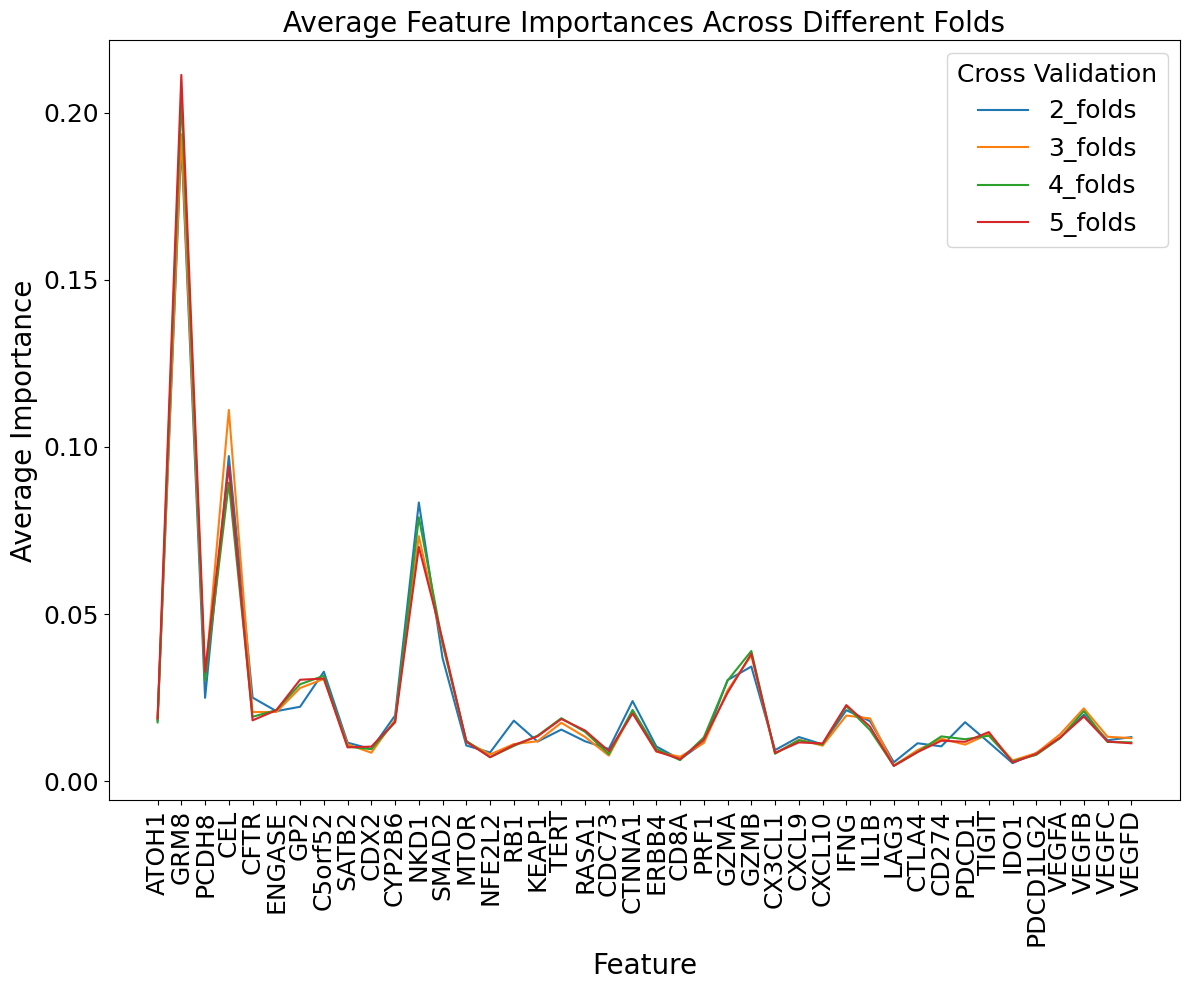

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the feature importances from the CSV
feature_importances = pd.read_csv('../data/final/feature_importances_across_folds.csv', index_col=0)

# Plot the feature importances
plt.figure(figsize=(12, 10))

for column in feature_importances.columns:
    plt.plot(feature_importances.index, feature_importances[column], label=column)

plt.title('Average Feature Importances Across Different Folds', fontsize=20)
plt.xlabel('Feature', fontsize=20)
plt.ylabel('Average Importance', fontsize=20)
plt.legend(title='Cross Validation', title_fontsize=18, fontsize=18)
plt.xticks(rotation=90, fontsize=18)  # Rotate feature names for better readability
plt.yticks(fontsize=18)
plt.tight_layout()  # Adjust layout to fit all labels
plt.show()
